In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [3]:
df = pd.read_csv('data/personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [33]:
print(df.describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max              15.000000       10.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


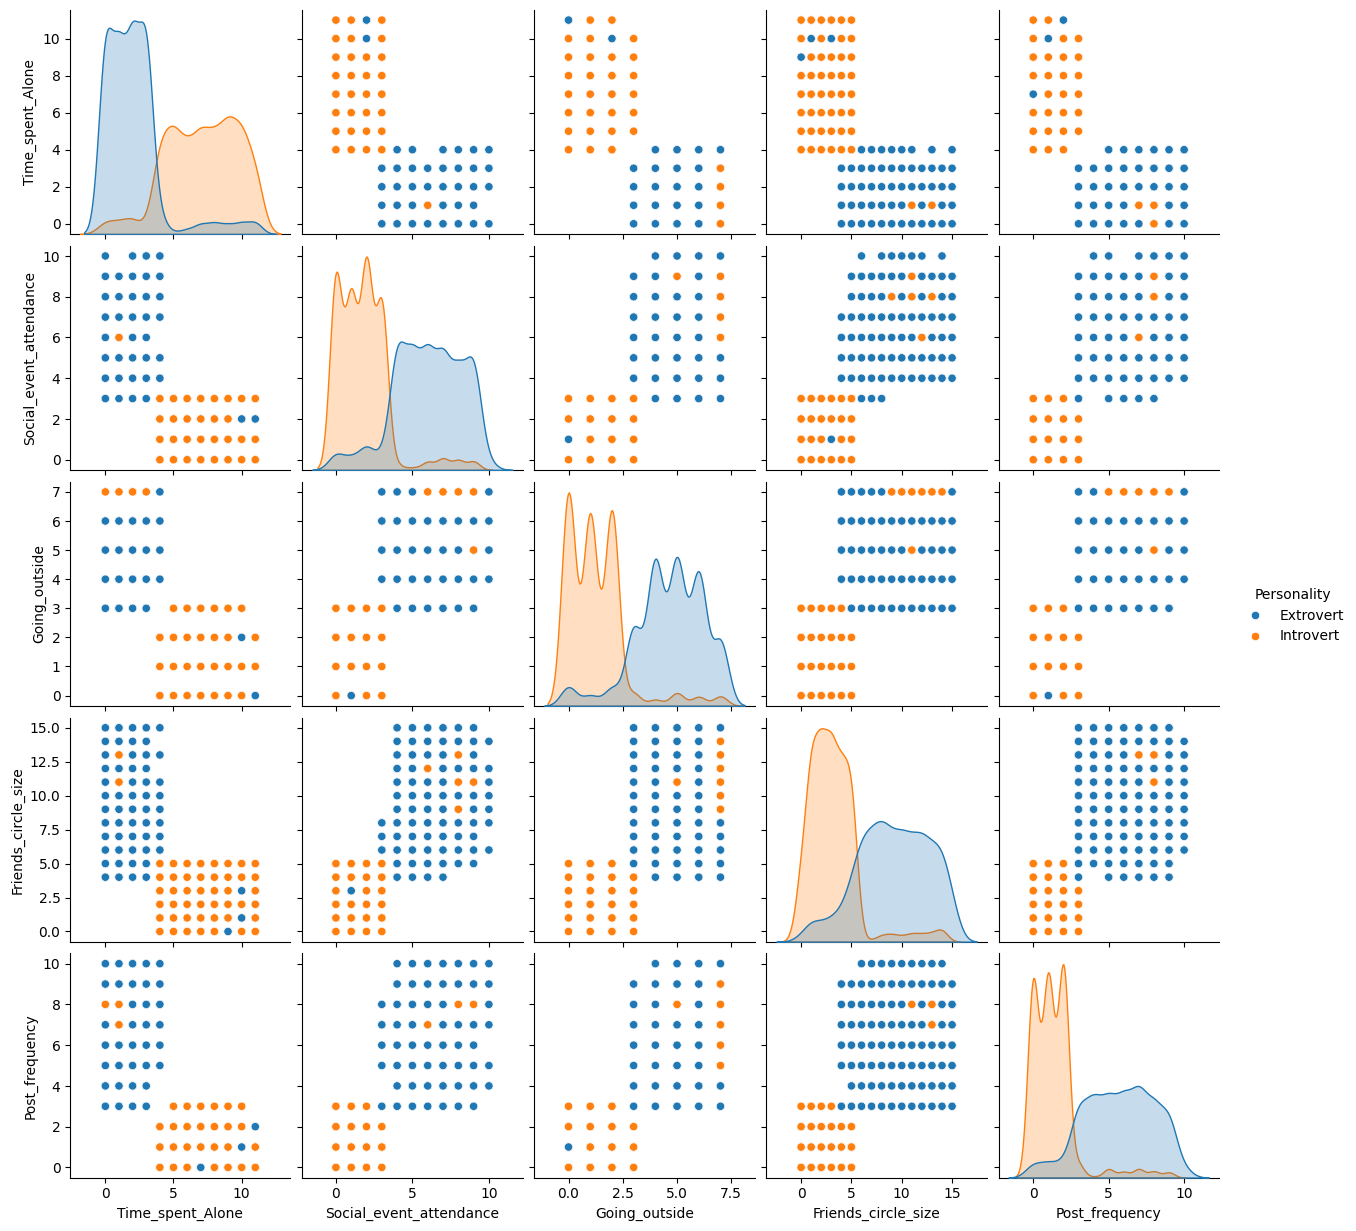

In [ ]:
sns.pairplot(df, hue='Personality')

<Axes: >

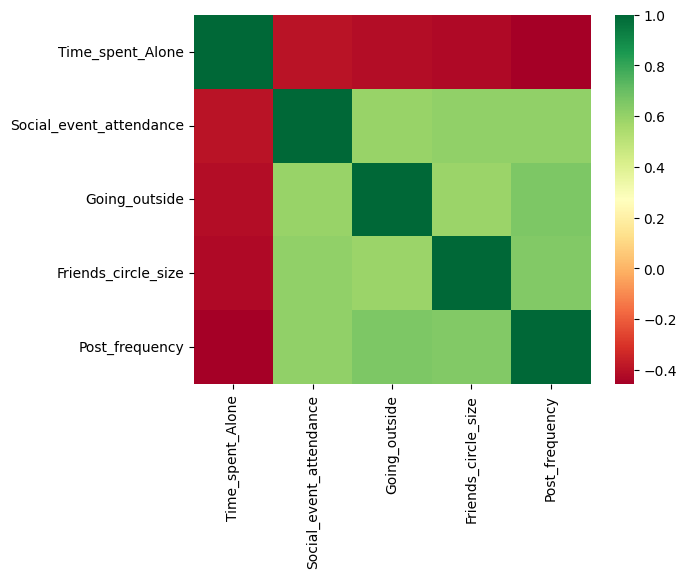

In [31]:
sns.heatmap(
    df[df['Personality']=='Introvert'].select_dtypes(include=['float']).corr(),
    cmap='RdYlGn',
)

<Axes: >

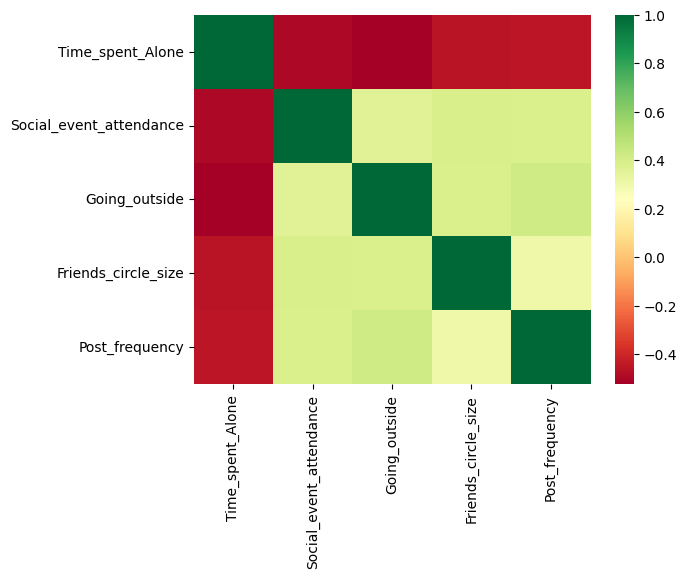

In [32]:

sns.heatmap(
    df[df['Personality']=='Extrovert'].select_dtypes(include=['float']).corr(),
    cmap='RdYlGn',
)

<Axes: >

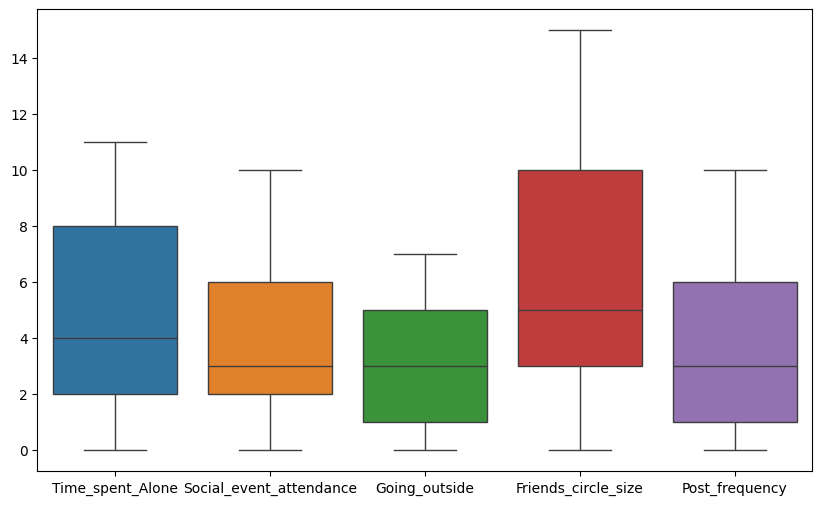

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

In [97]:
data: pd.DataFrame = df.copy()
data = data.dropna().reset_index().drop(columns=['index'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 154.9+ KB


In [98]:
columns = data.select_dtypes(include=['float']).columns
data[columns] = np.log1p(data[columns])
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,1.609438,No,1.609438,1.945910,No,2.639057,1.791759,Extrovert
1,2.302585,Yes,0.000000,0.000000,Yes,0.000000,1.386294,Introvert
2,2.302585,Yes,0.693147,1.098612,Yes,1.791759,1.098612,Introvert
3,0.000000,No,1.945910,2.079442,No,2.708050,2.197225,Extrovert
4,1.386294,No,2.302585,1.609438,No,2.197225,1.791759,Extrovert


In [99]:
columns = data.select_dtypes(include=['object']).columns
binarizer = LabelBinarizer()
for column in columns:
    data[column] = binarizer.fit_transform(data[column])
print(data.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0          1.609438           0                 1.609438       1.945910   
1          2.302585           1                 0.000000       0.000000   
2          2.302585           1                 0.693147       1.098612   
3          0.000000           0                 1.945910       2.079442   
4          1.386294           0                 2.302585       1.609438   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0             2.639057        1.791759            0  
1                          1             0.000000        1.386294            1  
2                          1             1.791759        1.098612            1  
3                          0             2.708050        2.197225            0  
4                          0             2.197225        1.791759            0  


In [101]:
from sklearn.decomposition import PCA

xcolumns = data.columns.to_list()
xcolumns.remove("Personality")

x = data[columns]
y = data["Personality"]

pca = PCA(n_components=0.99)
x_prime = pca.fit_transform(x)

data1 = pd.concat([pd.DataFrame(x_prime), y.to_frame()], axis=1)
data1.head()

,0,1,Personality
0,-0.856565,-0.012418,0
1,0.874846,0.034679,1
2,0.874846,0.034679,1
3,-0.856565,-0.012418,0
4,-0.856565,-0.012418,0


In [109]:
introverted = data[data['Personality'] == 1]['Post_frequency']
extroverted = data[data['Personality'] == 0]['Post_frequency']

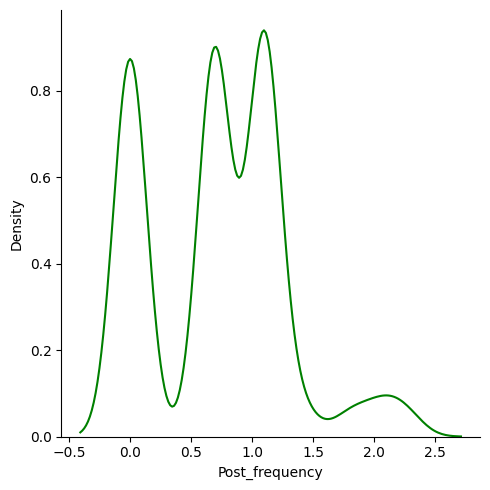

In [112]:
sns.displot(
    introverted,
    color='green',
    kind='kde'
)

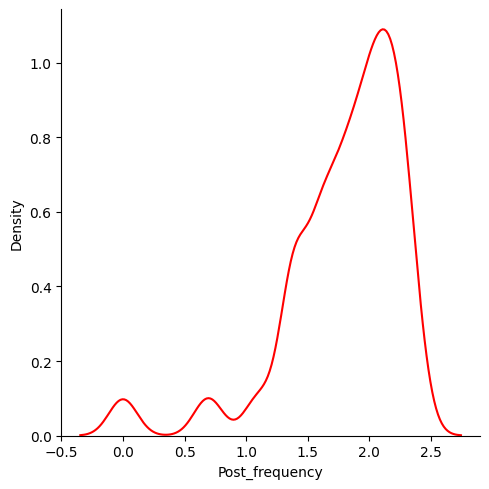

In [113]:
sns.displot(
    extroverted,
    color='red',
    kind='kde'
)

In [ ]:
from scipy import stats

print(introverted.mean(), extroverted.mean())

t_val, p_val = stats.ttest_ind(introverted, extroverted)
print(t_val, p_val)


0.7102756365321878 1.7936593232235696
-51.500594067411924 0.0
